In [234]:
import pandas as pd
from matplotlib import pyplot as plt

In [235]:
players=pd.read_csv('Cleaned_datasets/Players.csv')
players.head()

,Player ID,Player Name,Batting Style,Bowling Style,Playing Role,Test Batting Pos,ODI Batting Pos,T20I Batting Pos,Bowling Type
0,35320,Sachin Ramesh Tendulkar,Right hand Bat,"Right arm Offbreak, Legbreak Googly",Top order Batter,Middle Order,Openers,Openers,Spin
1,253802,Virat Kohli,Right hand Bat,Right arm Medium,Top order Batter,Middle Order,Top Order,Top Order,Right-arm Pacer
2,28114,Rahul Sharad Dravid,Right hand Bat,Right arm Offbreak,Top order Batter,Top Order,Top Order,Top Order,Spin
3,34102,Rohit Gurunath Sharma,Right hand Bat,Right arm Offbreak,Top order Batter,Openers,Openers,Openers,Spin
4,28779,Sourav Chandidas Ganguly,Left hand Bat,Right arm Medium,Batter,Middle Order,Openers,NaN,Right-arm Pacer


In [236]:
df1=pd.read_excel('Cleaned_datasets/ODI.xlsx')
df1.head()

,Player ID,Matches,Innings,Runs,Avg,SR,100,50
0,35320,463,452,18426,44.83,86.23,49,96
1,253802,298,286,14180,57.78,93.43,50,73
2,28779,308,297,11221,40.95,73.65,22,71
3,34102,269,261,11029,49.01,92.75,32,57
4,28114,340,314,10768,39.15,71.18,12,82


# Batting

In [237]:
batsmen=players[['Player ID','Player Name','Playing Role','ODI Batting Pos']].merge(df1,on='Player ID',how='right')

In [238]:
batsmen.head()

,Player ID,Player Name,Playing Role,ODI Batting Pos,Matches,Innings,Runs,Avg,SR,100,50
0,35320,Sachin Ramesh Tendulkar,Top order Batter,Openers,463,452,18426,44.83,86.23,49,96
1,253802,Virat Kohli,Top order Batter,Top Order,298,286,14180,57.78,93.43,50,73
2,28779,Sourav Chandidas Ganguly,Batter,Openers,308,297,11221,40.95,73.65,22,71
3,34102,Rohit Gurunath Sharma,Top order Batter,Openers,269,261,11029,49.01,92.75,32,57
4,28114,Rahul Sharad Dravid,Top order Batter,Top Order,340,314,10768,39.15,71.18,12,82


In [239]:
batsmen.isna().sum()

Player ID           0
Player Name         0
Playing Role       56
ODI Batting Pos     1
Matches             0
Innings             0
Runs                0
Avg                 0
SR                  0
100                 0
50                  0
dtype: int64

In [240]:
batsmen['Runs Score']=((batsmen['Runs']/10000)*100).clip(upper=100)
batsmen['Avg Score']=((batsmen['Avg']/40)*100).clip(upper=100)
batsmen['100 Score']=((batsmen['100']/30)*100).clip(upper=100)
batsmen['SR Score']=((batsmen['SR']/85)*100).clip(upper=100)
batsmen['50 Score']=((batsmen['50']/55*100)).clip(upper=100)
batsmen['Batting Score']=(0.25*batsmen['Runs Score'])+(0.25*batsmen['Avg Score'])+(0.30*batsmen['SR Score'])+(0.05*batsmen['50 Score'])+(0.15*batsmen['100 Score'])

In [241]:
batsmen.head()

,Player ID,Player Name,Playing Role,ODI Batting Pos,Matches,Innings,Runs,Avg,SR,100,50,Runs Score,Avg Score,100 Score,SR Score,50 Score,Batting Score
0,35320,Sachin Ramesh Tendulkar,Top order Batter,Openers,463,452,18426,44.83,86.23,49,96,100.0,100.000,100.000000,100.000000,100.0,100.000000
1,253802,Virat Kohli,Top order Batter,Top Order,298,286,14180,57.78,93.43,50,73,100.0,100.000,100.000000,100.000000,100.0,100.000000
2,28779,Sourav Chandidas Ganguly,Batter,Openers,308,297,11221,40.95,73.65,22,71,100.0,100.000,73.333333,86.647059,100.0,91.994118
3,34102,Rohit Gurunath Sharma,Top order Batter,Openers,269,261,11029,49.01,92.75,32,57,100.0,100.000,100.000000,100.000000,100.0,100.000000
4,28114,Rahul Sharad Dravid,Top order Batter,Top Order,340,314,10768,39.15,71.18,12,82,100.0,97.875,40.000000,83.741176,100.0,85.591103


In [242]:
batsmen.sort_values('Batting Score',ascending=False).head(10)

,Player ID,Player Name,Playing Role,ODI Batting Pos,Matches,Innings,Runs,Avg,SR,100,50,Runs Score,Avg Score,100 Score,SR Score,50 Score,Batting Score
0,35320,Sachin Ramesh Tendulkar,Top order Batter,Openers,463,452,18426,44.83,86.23,49,96,100.00,100.000,100.000000,100.000000,100.000000,100.000000
3,34102,Rohit Gurunath Sharma,Top order Batter,Openers,269,261,11029,49.01,92.75,32,57,100.00,100.000,100.000000,100.000000,100.000000,100.000000
1,253802,Virat Kohli,Top order Batter,Top Order,298,286,14180,57.78,93.43,50,73,100.00,100.000,100.000000,100.000000,100.000000,100.000000
2,28779,Sourav Chandidas Ganguly,Batter,Openers,308,297,11221,40.95,73.65,22,71,100.00,100.000,73.333333,86.647059,100.000000,91.994118
5,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,Middle Order,347,294,10599,50.23,87.13,9,73,100.00,100.000,30.000000,100.000000,100.000000,89.500000
7,36084,Yuvraj Singh,Middle order Batter,Middle Order,301,275,8609,36.47,87.43,14,52,86.09,91.175,46.666667,100.000000,94.545455,86.043523
4,28114,Rahul Sharad Dravid,Top order Batter,Top Order,340,314,10768,39.15,71.18,12,82,100.00,97.875,40.000000,83.741176,100.000000,85.591103
9,28235,Shikhar Dhawan,Opening Batter,Openers,167,164,6793,44.11,91.35,17,39,67.93,100.000,56.666667,100.000000,70.909091,84.027955
8,35263,Virender Sehwag,Top order Batter,Openers,241,235,7995,35.37,104.44,15,37,79.95,88.425,50.000000,100.000000,67.272727,82.957386
6,26329,Mohammad Azharuddin,Middle order Batter,NaN,334,308,9378,36.92,74.02,7,58,93.78,92.300,23.333333,87.082353,100.000000,81.144706


In [243]:
openers=batsmen[batsmen['ODI Batting Pos']=='Openers'].head(10)

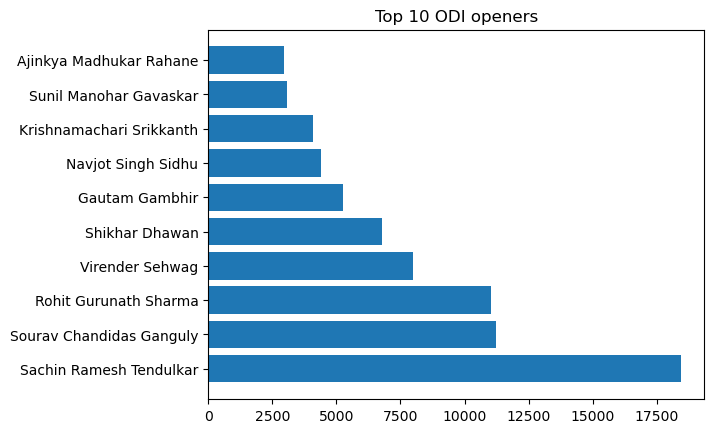

In [244]:
plt.title("Top 10 ODI openers")
plt.barh(openers['Player Name'],openers['Runs']);

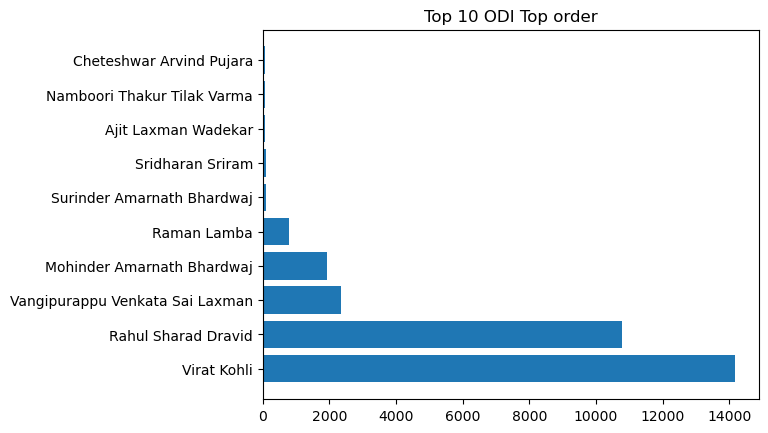

In [245]:
toporder=batsmen[batsmen['ODI Batting Pos']=='Top Order'].head(10)
plt.title("Top 10 ODI Top order")
plt.barh(toporder['Player Name'],toporder['Runs']);

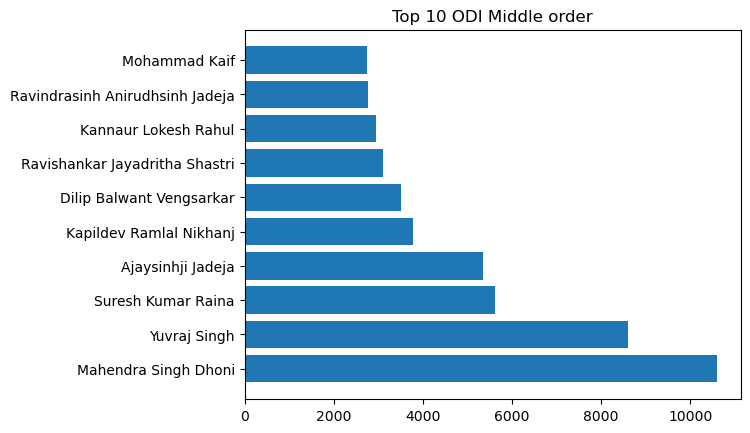

In [246]:
middleorder=batsmen[batsmen['ODI Batting Pos']=='Middle Order'].head(10)
plt.title("Top 10 ODI Middle order")
plt.barh(middleorder['Player Name'],middleorder['Runs']);

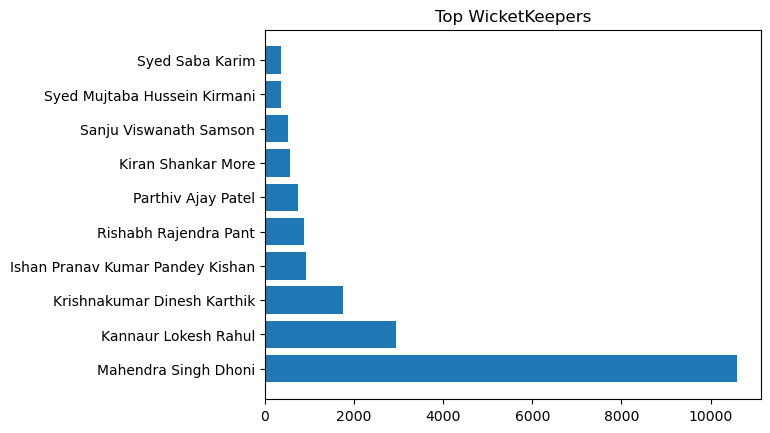

In [247]:
wicketkeeper=batsmen[batsmen['Playing Role']=='Wicketkeeper Batter'].head(10)
plt.title("Top WicketKeepers")
plt.barh(wicketkeeper['Player Name'],wicketkeeper['Runs']);

# Bowling

In [248]:
df3=pd.read_excel('Cleaned_datasets/ODI.xlsx',sheet_name='Bowling')
df3.head()

,Player ID,Matches,Innings,Wkts,Avg,Econ,SR,4,5
0,30176,269,263,334,30.83,4.29,43.0,8,2
1,34105,229,227,315,28.08,4.44,37.8,7,3
2,26184,191,188,188,27.85,5.07,32.9,10,2
3,30102,194,191,269,27.89,4.95,36.4,7,1
4,29264,234,225,265,33.47,4.30,46.6,2,3


In [249]:
bowlers=players[['Player ID','Player Name','Bowling Style','Playing Role','Bowling Type']].merge(df3,on='Player ID',how='right')
bowlers.head()

,Player ID,Player Name,Bowling Style,Playing Role,Bowling Type,Matches,Innings,Wkts,Avg,Econ,SR,4,5
0,30176,Anil Kumble,Legbreak Googly,Bowler,Spin,269,263,334,30.83,4.29,43.0,8,2
1,34105,Javagal Srinath,Right arm Fast medium,Bowler,Right-arm Pacer,229,227,315,28.08,4.44,37.8,7,3
2,26184,Ajit Bhalchandra Agarkar,Right arm Fast,Bowler,Right-arm Pacer,191,188,188,27.85,5.07,32.9,10,2
3,30102,Zaheer Khan,Left arm Fast medium,Bowler,Left-arm Pacer,194,191,269,27.89,4.95,36.4,7,1
4,29264,Harbhajan Singh,Right arm Offbreak,Bowler,Spin,234,225,265,33.47,4.30,46.6,2,3


In [250]:
bowlers['Avg Score']=((24/bowlers['Avg'])*100).clip(upper=100)
bowlers['Econ Score']=((4.6/bowlers['Econ'])*100).clip(upper=100)
bowlers['SR Score']=((35/bowlers['SR'])*100).clip(upper=100)
bowlers['Wkts Score']=((bowlers['Wkts']/300)*100).clip(upper=100)
bowlers['5 Score']=((bowlers['5']/3)*100).clip(upper=100)
bowlers['4 Score']=((bowlers['4']/7)*100).clip(upper=100)

In [251]:
bowlers['Bowling Score']=(0.20*bowlers['Wkts Score'])+(0.25*bowlers['Avg Score'])+(0.2*bowlers['SR Score'])+(0.30*bowlers['Econ Score'])+(0.05*bowlers['5 Score'])

In [252]:
bowlers['Bowling Score'] = bowlers.apply(lambda row: row['Bowling Score'] if row['Innings'] >(row['Matches'] * 0.6) else 0, axis=1)

In [253]:
bowlers.sort_values('Bowling Score',ascending=False).head(10)

,Player ID,Player Name,Bowling Style,Playing Role,Bowling Type,Matches,Innings,Wkts,Avg,Econ,SR,4,5,Avg Score,Econ Score,SR Score,Wkts Score,5 Score,4 Score,Bowling Score
1,34105,Javagal Srinath,Right arm Fast medium,Bowler,Right-arm Pacer,229,227,315,28.08,4.44,37.8,7,3,85.470085,100.000000,92.592593,100.000000,100.000000,100.000000,94.886040
0,30176,Anil Kumble,Legbreak Googly,Bowler,Spin,269,263,334,30.83,4.29,43.0,8,2,77.846254,100.000000,81.395349,100.000000,66.666667,100.000000,89.073967
15,625383,Jasprit Jasbirsingh Bumrah,Right arm Fast,Bowler,Right-arm Pacer,89,88,149,23.55,4.59,30.7,6,2,100.000000,100.000000,100.000000,49.666667,66.666667,85.714286,88.266667
3,30102,Zaheer Khan,Left arm Fast medium,Bowler,Left-arm Pacer,194,191,269,27.89,4.95,36.4,7,1,86.052349,92.929293,96.153846,89.666667,33.333333,100.000000,88.222644
7,481896,Mohammed Shami Ahmed,Right arm Fast,Bowler,Right-arm Pacer,104,103,202,24.63,5.57,25.4,10,6,97.442144,82.585278,100.000000,67.333333,100.000000,100.000000,87.602786
5,30028,Kapildev Ramlal Nikhanj,Right arm Fast medium,Bowling Allrounder,Right-arm Pacer,225,221,253,27.45,3.71,44.2,3,1,87.431694,100.000000,79.185520,84.333333,33.333333,42.857143,86.228361
4,29264,Harbhajan Singh,Right arm Offbreak,Bowler,Spin,234,225,265,33.47,4.30,46.6,2,3,71.706005,100.000000,75.107296,88.333333,100.000000,28.571429,85.614627
9,559235,Kuldeep Yadav,Left arm Wrist spin,Bowler,Spin,109,106,174,26.47,4.99,31.8,7,2,90.668682,92.184369,100.000000,58.000000,66.666667,100.000000,85.255814
2,26184,Ajit Bhalchandra Agarkar,Right arm Fast,Bowler,Right-arm Pacer,191,188,188,27.85,5.07,32.9,10,2,86.175943,90.729783,100.000000,62.666667,66.666667,100.000000,84.629587
11,32323,Manoj Prabhakar,Right arm Medium,Bowling Allrounder,Right-arm Pacer,130,127,157,28.87,4.27,40.5,4,2,83.131278,100.000000,86.419753,52.333333,66.666667,57.142857,81.866770


# Fielding

In [254]:
df4=pd.read_excel('Cleaned_datasets/ODI.xlsx',sheet_name='Fielding')
df4.head()

,Player ID,Matches,Dismissals,Catches,Stumps,Ct Wk,Ct Fi,D/I
0,28081,347,438,318,120,318,0,1.280
1,28114,340,210,196,14,72,124,0.623
2,26329,334,156,156,0,0,156,0.469
3,253802,298,156,156,0,0,156,0.528
4,31036,140,154,110,44,110,0,1.107


In [255]:
field=players[['Player ID','Player Name','Playing Role']].merge(df4,on='Player ID',how='right')
field.head()

,Player ID,Player Name,Playing Role,Matches,Dismissals,Catches,Stumps,Ct Wk,Ct Fi,D/I
0,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,347,438,318,120,318,0,1.280
1,28114,Rahul Sharad Dravid,Top order Batter,340,210,196,14,72,124,0.623
2,26329,Mohammad Azharuddin,Middle order Batter,334,156,156,0,0,156,0.469
3,253802,Virat Kohli,Top order Batter,298,156,156,0,0,156,0.528
4,31036,Nayan Ramlal Mongia,Wicketkeeper,140,154,110,44,110,0,1.107


In [256]:
field['Stumpings Score'] = ((field['Stumps'] / 40) * 100).clip(upper=100)
field['Keeper Catches Score'] = ((field['Ct Wk'] / 100) * 100).clip(upper=100)
field['D/I keeper Score'] = ((field['D/I'] / 1.5) * 100).clip(upper=100)
field['Final Keeper Score'] = (((0.50 * field['Stumpings Score']) + (0.20 * field['D/I keeper Score']) + (0.30 * field['Keeper Catches Score']))).clip(upper=100)

In [257]:
field['D/I fielder Score'] = ((field['D/I'] / 0.5) * 100  ).clip(upper=100)
field['Fielding Catches Score'] = ((field['Ct Fi'] / 100) * 100).clip(upper=100)
field['Final Fielding Score'] = ( ((0.70 * field['Fielding Catches Score']) + (0.30 * field['D/I fielder Score']))).clip(upper=100)

In [258]:
field.head()

,Player ID,Player Name,Playing Role,Matches,Dismissals,Catches,Stumps,Ct Wk,Ct Fi,D/I,Stumpings Score,Keeper Catches Score,D/I keeper Score,Final Keeper Score,D/I fielder Score,Fielding Catches Score,Final Fielding Score
0,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,347,438,318,120,318,0,1.280,100.0,100.0,85.333333,97.066667,100.0,0.0,30.00
1,28114,Rahul Sharad Dravid,Top order Batter,340,210,196,14,72,124,0.623,35.0,72.0,41.533333,47.406667,100.0,100.0,100.00
2,26329,Mohammad Azharuddin,Middle order Batter,334,156,156,0,0,156,0.469,0.0,0.0,31.266667,6.253333,93.8,100.0,98.14
3,253802,Virat Kohli,Top order Batter,298,156,156,0,0,156,0.528,0.0,0.0,35.200000,7.040000,100.0,100.0,100.00
4,31036,Nayan Ramlal Mongia,Wicketkeeper,140,154,110,44,110,0,1.107,100.0,100.0,73.800000,94.760000,100.0,0.0,30.00


In [259]:
field.sort_values('Final Fielding Score',ascending=False)[field['Matches']>50]

C:\Users\vighn\AppData\Local\Temp\ipykernel_7800\5964327.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  field.sort_values('Final Fielding Score',ascending=False)[field['Matches']>50]


,Player ID,Player Name,Playing Role,Matches,Dismissals,Catches,Stumps,Ct Wk,Ct Fi,D/I,Stumpings Score,Keeper Catches Score,D/I keeper Score,Final Keeper Score,D/I fielder Score,Fielding Catches Score,Final Fielding Score
3,253802,Virat Kohli,Top order Batter,298,156,156,0,0,156,0.528,0.0,0.0,35.200000,7.040000,100.0,100.0,100.00
1,28114,Rahul Sharad Dravid,Top order Batter,340,210,196,14,72,124,0.623,35.0,72.0,41.533333,47.406667,100.0,100.0,100.00
2,26329,Mohammad Azharuddin,Middle order Batter,334,156,156,0,0,156,0.469,0.0,0.0,31.266667,6.253333,93.8,100.0,98.14
6,33335,Suresh Kumar Raina,Middle order Batter,226,102,102,0,0,102,0.457,0.0,0.0,30.466667,6.093333,91.4,100.0,97.42
8,34102,Rohit Gurunath Sharma,Top order Batter,269,96,96,0,0,96,0.359,0.0,0.0,23.933333,4.786667,71.8,96.0,88.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,30732,Praveenkumar Sakat Singh,Bowler,68,11,11,0,0,11,0.164,0.0,0.0,10.933333,2.186667,32.8,11.0,17.54
82,32965,Munaf Musa Patel,Bowler,70,11,11,0,0,11,0.161,0.0,0.0,10.733333,2.146667,32.2,11.0,17.36
96,33044,Sagi Lakshmi Venkatapathy Raju,Bowler,53,8,8,0,0,8,0.153,0.0,0.0,10.200000,2.040000,30.6,8.0,14.78
103,34274,Shanthakumaran Sreesanth,Bowler,53,7,7,0,0,7,0.134,0.0,0.0,8.933333,1.786667,26.8,7.0,12.94


In [260]:
batsmen.columns

Index(['Player ID', 'Player Name', 'Playing Role', 'ODI Batting Pos',
       'Matches', 'Innings', 'Runs', 'Avg', 'SR', '100', '50', 'Runs Score',
       'Avg Score', '100 Score', 'SR Score', '50 Score', 'Batting Score'],
      dtype='object')

In [261]:
bowlers.columns

Index(['Player ID', 'Player Name', 'Bowling Style', 'Playing Role',
       'Bowling Type', 'Matches', 'Innings', 'Wkts', 'Avg', 'Econ', 'SR', '4',
       '5', 'Avg Score', 'Econ Score', 'SR Score', 'Wkts Score', '5 Score',
       '4 Score', 'Bowling Score'],
      dtype='object')

In [262]:
field.columns

Index(['Player ID', 'Player Name', 'Playing Role', 'Matches', 'Dismissals',
       'Catches', 'Stumps', 'Ct Wk', 'Ct Fi', 'D/I', 'Stumpings Score',
       'Keeper Catches Score', 'D/I keeper Score', 'Final Keeper Score',
       'D/I fielder Score', 'Fielding Catches Score', 'Final Fielding Score'],
      dtype='object')

In [263]:
allround=batsmen[['Player ID','Player Name','Playing Role','ODI Batting Pos','Batting Score']].merge(bowlers[['Player ID','Bowling Type','Bowling Score']],on='Player ID',how='outer').merge(
    field[['Player ID','Final Keeper Score','Final Fielding Score']],on='Player ID',how='outer'
)

In [264]:
allround.head()

,Player ID,Player Name,Playing Role,ODI Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score
0,26169,Syed Abid Ali,Bowler,Tail,44.563115,Right-arm Pacer,67.513497,0.00,0.00
1,26184,Ajit Bhalchandra Agarkar,Bowler,Tail,41.011845,Right-arm Pacer,84.629587,3.68,52.96
2,26225,Mohinder Amarnath Bhardwaj,Batting Allrounder,Top Order,46.437774,Right-arm Pacer,58.876653,3.64,32.48
3,26226,Surinder Amarnath Bhardwaj,NaN,Top Order,50.829806,NaN,NaN,4.44,20.68
4,26238,Pravin Kalyan Amre,Middle order Batter,Middle Order,36.948142,NaN,NaN,4.44,28.38


In [265]:
allround.fillna(0,inplace=True)

In [266]:
allround['Allround Score']=((0.5*(allround['Batting Score'])) + (0.5*(allround['Bowling Score'])))

In [267]:
allround.sort_values('Allround Score',ascending=False).head(10)

,Player ID,Player Name,Playing Role,ODI Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score
64,30028,Kapildev Ramlal Nikhanj,Bowling Allrounder,Middle Order,56.098977,Right-arm Pacer,86.228361,4.253333,68.84,71.163669
186,234675,Ravindrasinh Anirudhsinh Jadeja,Allrounder,Middle Order,58.560568,Spin,79.659183,5.040000,75.18,69.109876
152,34105,Javagal Srinath,Bowler,Tail,37.043336,Right-arm Pacer,94.886040,1.866667,30.80,65.964688
118,32685,Irfan Khan Pathan,Allrounder,Tail,47.006237,Left-arm Pacer,81.290833,2.360000,25.32,64.148535
1,26184,Ajit Bhalchandra Agarkar,Bowler,Tail,41.011845,Right-arm Pacer,84.629587,3.680000,52.96,62.820716
53,29264,Harbhajan Singh,Bowler,Tail,39.857500,Spin,85.614627,4.133333,68.30,62.736064
112,32323,Manoj Prabhakar,Bowling Allrounder,Tail,42.988235,Right-arm Pacer,81.866770,2.800000,31.50,62.427503
70,30102,Zaheer Khan,Bowler,Tail,34.648235,Left-arm Pacer,88.222644,3.000000,43.60,61.435440
218,481896,Mohammed Shami Ahmed,Bowler,Tail,34.753897,Right-arm Pacer,87.602786,4.133333,41.00,61.178342
23,27223,Stuart Terence Roger Binny,Allrounder,Middle Order,48.634659,Right-arm Pacer,73.698324,3.333333,17.10,61.166492


In [268]:
allround['Batsmen Score']=(0.9*allround['Batting Score'])+(0.1*allround['Final Fielding Score'])

In [269]:
allround.sort_values('Batsmen Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,ODI Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score
0,189,253802,Virat Kohli,Top order Batter,Top Order,100.000000,Right-arm Pacer,0.0,7.040000,100.00,50.000000,100.000000
1,150,34102,Rohit Gurunath Sharma,Top order Batter,Openers,100.000000,Spin,0.0,4.786667,88.74,50.000000,98.874000
2,163,35320,Sachin Ramesh Tendulkar,Top order Batter,Openers,100.000000,Spin,0.0,4.093333,88.42,50.000000,98.842000
3,47,28779,Sourav Chandidas Ganguly,Batter,Openers,91.994118,Right-arm Pacer,0.0,4.306667,88.68,45.997059,91.662706
4,37,28114,Rahul Sharad Dravid,Top order Batter,Top Order,85.591103,Spin,0.0,47.406667,100.00,42.795551,87.031993
5,184,36084,Yuvraj Singh,Middle order Batter,Middle Order,86.043523,Spin,0.0,4.200000,84.00,43.021761,85.839170
6,40,28235,Shikhar Dhawan,Opening Batter,Openers,84.027955,0,0.0,6.746667,88.10,42.013977,84.435159
7,34,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,Middle Order,89.500000,Right-arm Pacer,0.0,97.066667,30.00,44.750000,83.550000
8,160,35263,Virender Sehwag,Top order Batter,Openers,82.957386,Spin,0.0,5.080000,85.86,41.478693,83.247648
9,10,26329,Mohammad Azharuddin,Middle order Batter,0,81.144706,Right-arm Pacer,0.0,6.253333,98.14,40.572353,82.844235


In [270]:
allround['Bowler Score']=(0.95*allround['Bowling Score'])+(0.05*allround['Final Fielding Score'])

In [271]:
allround.sort_values('Bowler Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,ODI Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score,Bowler Score
0,152,34105,Javagal Srinath,Bowler,Tail,37.043336,Right-arm Pacer,94.886040,1.866667,30.80,65.964688,36.419002,91.681738
1,78,30176,Anil Kumble,Bowler,Tail,30.257574,Spin,89.073967,4.253333,78.64,59.665770,35.095816,88.552268
2,70,30102,Zaheer Khan,Bowler,Tail,34.648235,Left-arm Pacer,88.222644,3.000000,43.60,61.435440,35.543412,85.991512
3,227,625383,Jasprit Jasbirsingh Bumrah,Bowler,Tail,25.163824,Right-arm Pacer,88.266667,2.720000,33.24,56.715245,25.971441,85.515333
4,64,30028,Kapildev Ramlal Nikhanj,Bowling Allrounder,Middle Order,56.098977,Right-arm Pacer,86.228361,4.253333,68.84,71.163669,57.373080,85.358943
5,218,481896,Mohammed Shami Ahmed,Bowler,Tail,34.753897,Right-arm Pacer,87.602786,4.133333,41.00,61.178342,35.378507,85.272647
6,53,29264,Harbhajan Singh,Bowler,Tail,39.857500,Spin,85.614627,4.133333,68.30,62.736064,42.701750,84.748896
7,1,26184,Ajit Bhalchandra Agarkar,Bowler,Tail,41.011845,Right-arm Pacer,84.629587,3.680000,52.96,62.820716,42.206660,83.046108
8,224,559235,Kuldeep Yadav,Bowler,Tail,24.544706,Spin,85.255814,1.986667,20.14,54.900260,24.104235,82.000024
9,186,234675,Ravindrasinh Anirudhsinh Jadeja,Allrounder,Middle Order,58.560568,Spin,79.659183,5.040000,75.18,69.109876,60.222511,79.435224


In [272]:
allround['Allrounder Score']=(0.8*allround['Allround Score'])+(0.2*allround['Final Fielding Score'])

In [273]:
allround.sort_values('Allrounder Score',ascending=False).head(10).reset_index(drop=True)

,Player ID,Player Name,Playing Role,ODI Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score,Bowler Score,Allrounder Score
0,30028,Kapildev Ramlal Nikhanj,Bowling Allrounder,Middle Order,56.098977,Right-arm Pacer,86.228361,4.253333,68.84,71.163669,57.373080,85.358943,70.698935
1,234675,Ravindrasinh Anirudhsinh Jadeja,Allrounder,Middle Order,58.560568,Spin,79.659183,5.040000,75.18,69.109876,60.222511,79.435224,70.323900
2,29264,Harbhajan Singh,Bowler,Tail,39.857500,Spin,85.614627,4.133333,68.30,62.736064,42.701750,84.748896,63.848851
3,30176,Anil Kumble,Bowler,Tail,30.257574,Spin,89.073967,4.253333,78.64,59.665770,35.095816,88.552268,63.460616
4,26184,Ajit Bhalchandra Agarkar,Bowler,Tail,41.011845,Right-arm Pacer,84.629587,3.680000,52.96,62.820716,42.206660,83.046108,60.848573
5,253802,Virat Kohli,Top order Batter,Top Order,100.000000,Right-arm Pacer,0.000000,7.040000,100.00,50.000000,100.000000,5.000000,60.000000
6,34105,Javagal Srinath,Bowler,Tail,37.043336,Right-arm Pacer,94.886040,1.866667,30.80,65.964688,36.419002,91.681738,58.931750
7,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,56.400000,Right-arm Pacer,65.605258,5.293333,48.32,61.002629,55.592000,64.740995,58.466103
8,30102,Zaheer Khan,Bowler,Tail,34.648235,Left-arm Pacer,88.222644,3.000000,43.60,61.435440,35.543412,85.991512,57.868352
9,34102,Rohit Gurunath Sharma,Top order Batter,Openers,100.000000,Spin,0.000000,4.786667,88.74,50.000000,98.874000,4.437000,57.748000


In [274]:
allround['Keeper Score']=(0.7*allround['Final Keeper Score'])+(0.3*allround['Batting Score'])

In [275]:
allround.sort_values('Keeper Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,ODI Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score,Bowler Score,Allrounder Score,Keeper Score
0,34,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,Middle Order,89.500000,Right-arm Pacer,0.0,97.066667,30.00,44.750000,83.550000,1.500,41.800000,94.796667
1,93,31036,Nayan Ramlal Mongia,Wicketkeeper,Middle Order,40.312333,0,0.0,94.760000,30.00,20.156166,39.281100,1.500,22.124933,78.425700
2,37,28114,Rahul Sharad Dravid,Top order Batter,Top Order,85.591103,Spin,0.0,47.406667,100.00,42.795551,87.031993,5.000,54.236441,58.861998
3,94,31038,Kiran Shankar More,Wicketkeeper Batter,Tail,34.178162,0,0.0,65.543333,30.00,17.089081,33.760346,1.500,19.671265,56.133782
4,208,422108,Kannaur Lokesh Rahul,Wicketkeeper Batter,Middle Order,67.496364,0,0.0,38.656667,37.70,33.748182,64.516727,1.885,34.538545,47.308576
5,109,32242,Parthiv Ajay Patel,Wicketkeeper Batter,Openers,44.041136,0,0.0,34.690000,30.00,22.020568,42.637023,1.500,23.616455,37.495341
6,104,32179,Chandrakant Sitaram Pandit,Wicketkeeper Batter,Tail,39.256985,0,0.0,34.356667,30.00,19.628493,38.331287,1.500,21.702794,35.826762
7,67,30045,Krishnakumar Dinesh Karthik,Wicketkeeper Batter,Middle Order,49.922594,0,0.0,29.316667,50.30,24.961297,49.960334,2.515,30.029037,35.498445
8,189,253802,Virat Kohli,Top order Batter,Top Order,100.000000,Right-arm Pacer,0.0,7.040000,100.00,50.000000,100.000000,5.000,60.000000,34.928000
9,150,34102,Rohit Gurunath Sharma,Top order Batter,Openers,100.000000,Spin,0.0,4.786667,88.74,50.000000,98.874000,4.437,57.748000,33.350667


In [276]:
allround[allround['Player Name']=='Hardik Himanshu Pandya']

,Player ID,Player Name,Playing Role,ODI Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score,Bowler Score,Allrounder Score,Keeper Score
226,625371,Hardik Himanshu Pandya,Allrounder,Middle Order,56.4,Right-arm Pacer,65.605258,5.293333,48.32,61.002629,55.592,64.740995,58.466103,20.625333


In [277]:
allround.head()

,Player ID,Player Name,Playing Role,ODI Batting Pos,Batting Score,Bowling Type,Bowling Score,Final Keeper Score,Final Fielding Score,Allround Score,Batsmen Score,Bowler Score,Allrounder Score,Keeper Score
0,26169,Syed Abid Ali,Bowler,Tail,44.563115,Right-arm Pacer,67.513497,0.00,0.00,56.038306,40.106803,64.137822,44.830645,13.368934
1,26184,Ajit Bhalchandra Agarkar,Bowler,Tail,41.011845,Right-arm Pacer,84.629587,3.68,52.96,62.820716,42.206660,83.046108,60.848573,14.879553
2,26225,Mohinder Amarnath Bhardwaj,Batting Allrounder,Top Order,46.437774,Right-arm Pacer,58.876653,3.64,32.48,52.657214,45.041997,57.556821,48.621771,16.479332
3,26226,Surinder Amarnath Bhardwaj,0,Top Order,50.829806,0,0.000000,4.44,20.68,25.414903,47.814826,1.034000,24.467922,18.356942
4,26238,Pravin Kalyan Amre,Middle order Batter,Middle Order,36.948142,0,0.000000,4.44,28.38,18.474071,36.091328,1.419000,20.455257,14.192443


In [278]:
allround.drop(['Player Name','Playing Role','ODI Batting Pos','Bowling Type'],axis=1,inplace=True)

In [279]:
allround.to_csv('ODI_Score.csv')